In [128]:
import kagglehub

path = kagglehub.dataset_download("taweilo/loan-approval-classification-data")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/taweilo/loan-approval-classification-data/versions/1


In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [130]:
df=pd.read_csv('/root/.cache/kagglehub/datasets/taweilo/loan-approval-classification-data/versions/1/loan_data.csv')

In [131]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [132]:
min=df['person_age'].min()
max=df['person_age'].max()
print(min,max)

20.0 144.0


In [133]:
df.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [135]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [136]:
df.shape

(45000, 14)

In [137]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


<Axes: xlabel='person_home_ownership'>

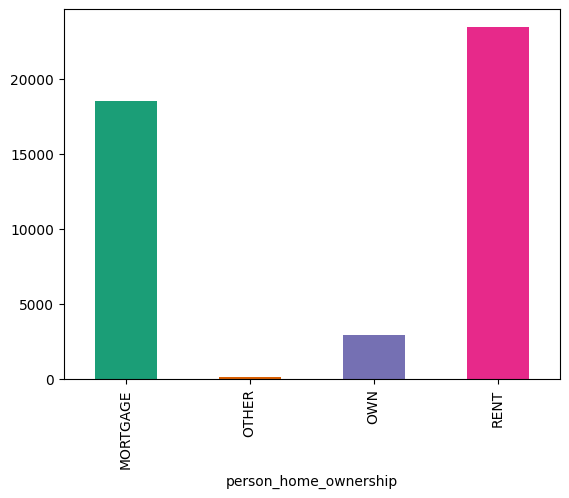

In [138]:
df.groupby('person_home_ownership').size().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))

<Axes: xlabel='loan_status'>

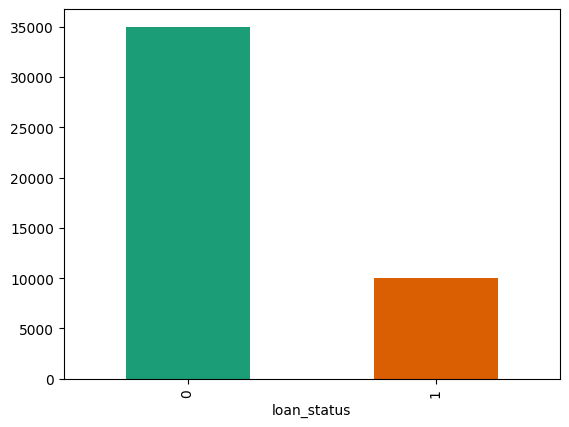

In [139]:
df.groupby('loan_status').size().plot(kind='bar',color=sns.palettes.mpl_palette('Dark2'))

<Axes: ylabel='person_education'>

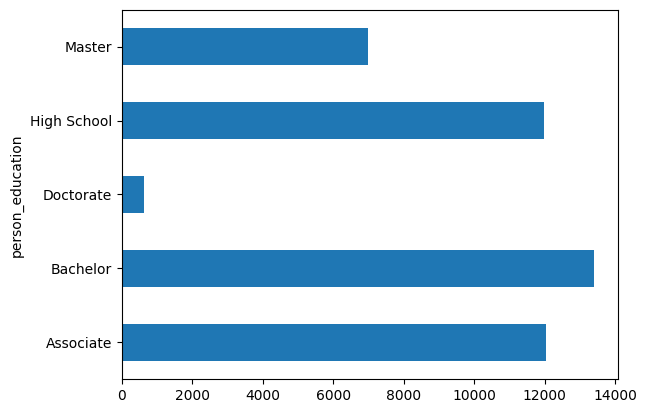

In [140]:
df.groupby('person_education').size().plot(kind='barh')

In [141]:
df['loan_intent'].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

<Axes: ylabel='loan_intent'>

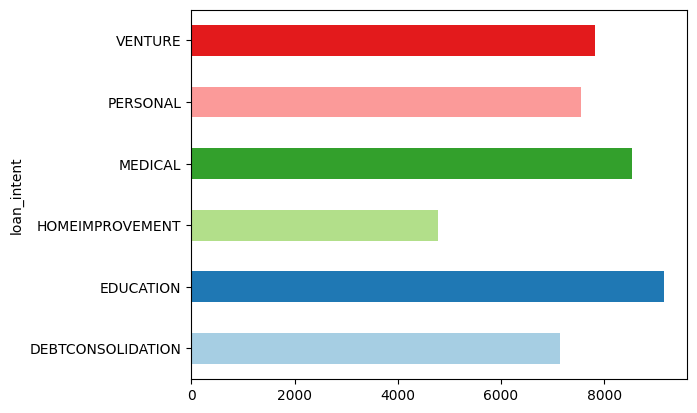

In [142]:
df.groupby('loan_intent').size().plot(kind='barh',color=sns.palettes.mpl_palette('Paired'))

<Axes: ylabel='previous_loan_defaults_on_file'>

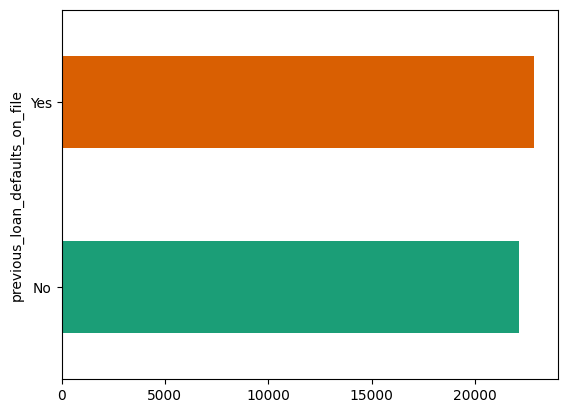

In [143]:
df.groupby('previous_loan_defaults_on_file').size().plot(kind='barh',color=sns.palettes.mpl_palette('Dark2'))

<Axes: ylabel='person_gender'>

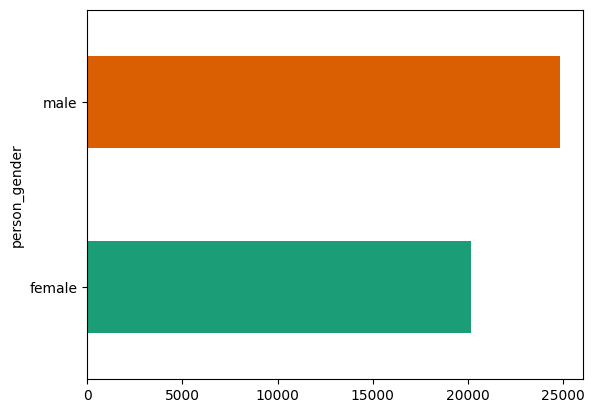

In [144]:
df.groupby('person_gender').size().plot(kind='barh',color=sns.palettes.mpl_palette('Dark2'))

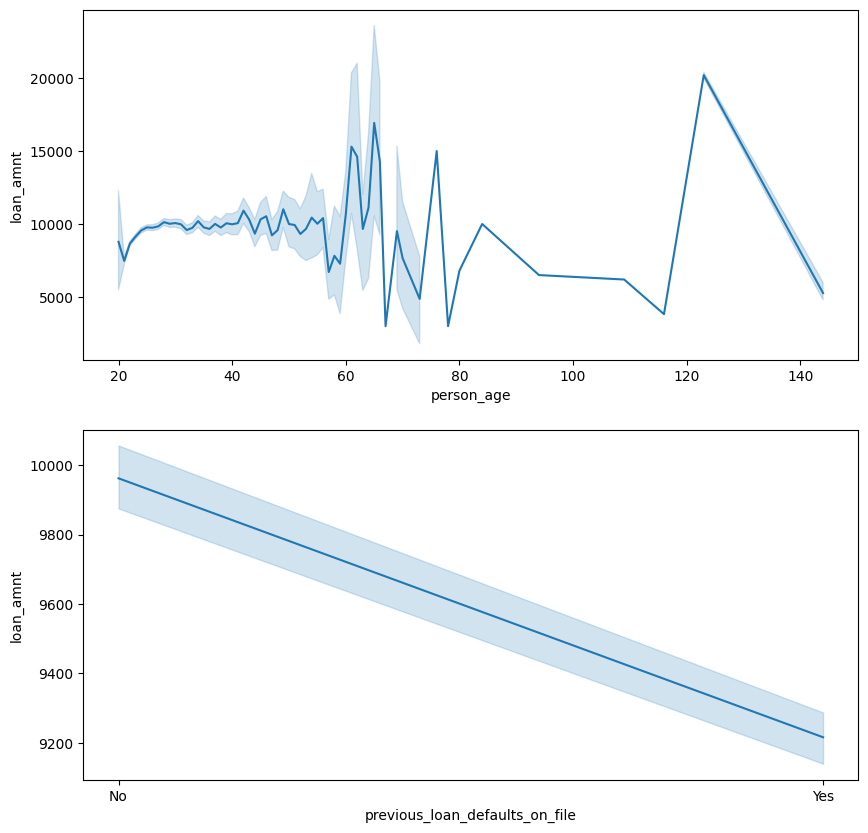

In [145]:
plt.figure(figsize=(10, 10))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)
sns.lineplot(x='person_age', y='loan_amnt', data=df, ax=ax1)
sns.lineplot(x='previous_loan_defaults_on_file', y='loan_amnt', data=df, ax=ax2)
plt.show()

In [146]:
df.head(5)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [147]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['person_gender']=le.fit_transform(df['person_gender'])
print("\n*************************************************\n")
print("Person Gender")
for og,la in zip(le.classes_,le.transform(le.classes_)):
    print(og,'=>',la)
print("\n*************************************************\n")
print("Person Eductation")
df['person_education']=le.fit_transform(df['person_education'])
for og,la in zip(le.classes_,le.transform(le.classes_)):
    print(og,'=>',la)
print("\n*************************************************\n")
print("Person Home Ownership")
df['person_home_ownership']=le.fit_transform(df['person_home_ownership'])
for og,la in zip(le.classes_,le.transform(le.classes_)):
    print(og,'=>',la)
print("\n*************************************************\n")
print("Loan Intent")
df['loan_intent']=le.fit_transform(df['loan_intent'])
for og,la in zip(le.classes_,le.transform(le.classes_)):
    print(og,'=>',la)
print("\n*************************************************\n")
print("Previous Loan Default")
df['previous_loan_defaults_on_file']=le.fit_transform(df['previous_loan_defaults_on_file'])
for og,la in zip(le.classes_,le.transform(le.classes_)):
    print(og,'=>',la)
print("\n*************************************************\n")


*************************************************

Person Gender
female => 0
male => 1

*************************************************

Person Eductation
Associate => 0
Bachelor => 1
Doctorate => 2
High School => 3
Master => 4

*************************************************

Person Home Ownership
MORTGAGE => 0
OTHER => 1
OWN => 2
RENT => 3

*************************************************

Loan Intent
DEBTCONSOLIDATION => 0
EDUCATION => 1
HOMEIMPROVEMENT => 2
MEDICAL => 3
PERSONAL => 4
VENTURE => 5

*************************************************

Previous Loan Default
No => 0
Yes => 1

*************************************************



In [148]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,4,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0,1
1,21.0,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1,0
2,25.0,0,3,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0,1
3,23.0,0,1,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0,1
4,24.0,1,4,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0,1


In [149]:
x=df.iloc[:,1:-1].values
y=df.iloc[:,-1].values

In [150]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [151]:
print(x.shape,y.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(45000, 12) (45000,)
(36000, 12)
(9000, 12)
(36000,)
(9000,)


In [152]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.849
[[6611  400]
 [ 959 1030]]


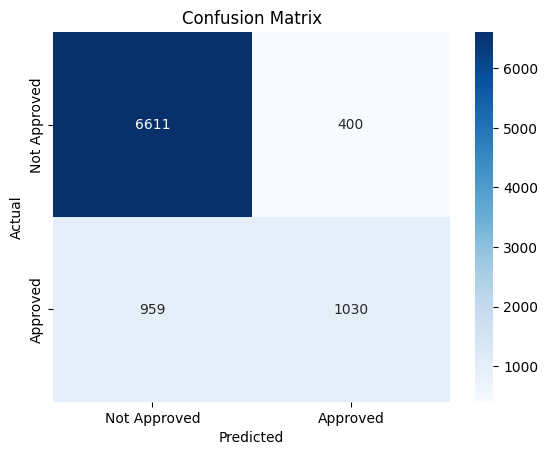

In [153]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Approved', 'Approved'],
            yticklabels=['Not Approved', 'Approved'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [154]:
import joblib
joblib.dump(lr,'loan_approval.pkl')

['loan_approval.pkl']

In [176]:
%%writefile app.py
import streamlit as st
import joblib
model=joblib.load('loan_approval.pkl')

Overwriting app.py


In [168]:
!pip install streamlit pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 59.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 93.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.6 MB/s eta 0:00:00


In [169]:
!ngrok config add-authtoken YOUR_AUTH_TOKEN

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [170]:
from pyngrok import ngrok

ngrok.kill()

public_url = ngrok.connect(addr="8501")
print(f"Access your Streamlit app here: {public_url}")

Access your Streamlit app here: NgrokTunnel: "https://a035-34-80-15-166.ngrok-free.app" -> "http://localhost:8501"


In [171]:
!streamlit run app.py &>/content/logs.txt &